In [2]:
!pip install rocketpy
!curl -o NACA0012-radians.txt https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/airfoils/NACA0012-radians.txt
!curl -o Cesaroni_M1670.eng https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/motors/cesaroni/Cesaroni_M1670.eng
!curl -o powerOffDragCurve.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/rockets/calisto/powerOffDragCurve.csv
!curl -o powerOnDragCurve.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/rockets/calisto/powerOnDragCurve.csv

You should consider upgrading via the '/Users/tamassimonds/Documents/Code/Ai/RocketEnv/myenv/bin/python3 -m pip install --upgrade pip' command.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1052  100  1052    0     0   3221      0 --:--:-- --:--:-- --:--:--  3226
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   163  100   163    0     0    497      0 --:--:-- --:--:-- --:--:--   498
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3362  100  3362    0     0  10072      0 --:--:-- --:--:-- --:--:-- 10096
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent   

In [3]:
from rocketpy import Environment, Flight, Rocket, SolidMotor

/Users/tamassimonds/Documents/Code/Ai/RocketEnv/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
%config InlineBackend.figure_formats = ['svg']


%matplotlib inline



In [5]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

In [6]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

In [7]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at  79.817 km (ASL): 9.5539 m/s²


Launch Site Details

Launch Date: 2025-04-01 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.817 km
Forecast Time Period: from 2025-03-30 12:00:00 to 2025-04-15 12:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 8.45 m/s
Surface Wind Direction: 207.90°
Surface Wind Heading: 27.90°
Surface Pressure: 844.16 hPa
Surface Temperature: 286.00 K
Surface Air Density: 1.028 kg/m³
Surface Speed of Sound: 339.02 m/s


Earth Model Details

Earth Radius at Launch 

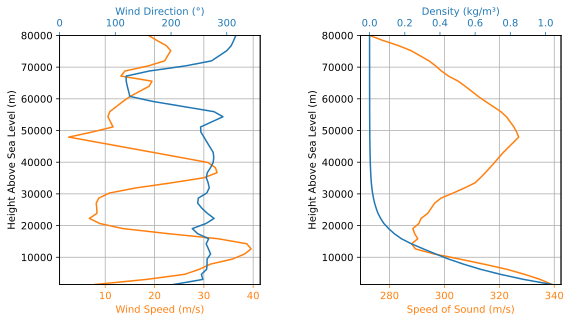

In [8]:
env.info()

In [9]:
Pro75M1670 = SolidMotor(
    thrust_source="configs/Cesaroni_M1670.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)


Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Structural Mass Ratio: 0.380
Average Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns



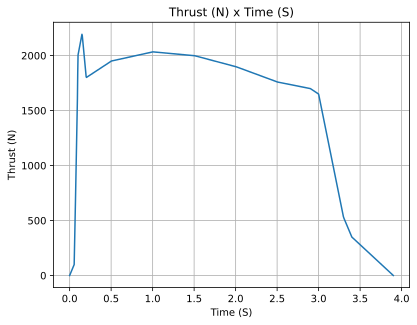

In [10]:
Pro75M1670.info()

In [11]:
calisto = Rocket(
    radius=127 / 1000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="configs/powerOffDragCurve.csv",
    power_on_drag="configs/powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

rail_buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.618,
    angular_position=45,
)

In [12]:
calisto.add_motor(Pro75M1670, position=-1.255)

In [13]:
nose_cone = calisto.add_nose(length=0.55829, kind="vonKarman", position=1.278)

fin_set = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=("configs/NACA0012-radians.txt", "radians"),
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)


Inertia Details

Rocket Mass: 14.426 kg (without motor)
Rocket Dry Mass: 16.241 kg (with unloaded motor)
Rocket Loaded Mass: 19.197 kg
Rocket Structural Mass Ratio: 0.846
Rocket Inertia (with unloaded motor) 11: 7.864 kg*m2
Rocket Inertia (with unloaded motor) 22: 7.864 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.036 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.0635 m
Rocket Frontal Area: 0.012668 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.105 m
Rocket Center of Dry Mass - Nozzle Exit: 1.150 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.753 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.116 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 6.280/rad
Tail Lift Coefficient De

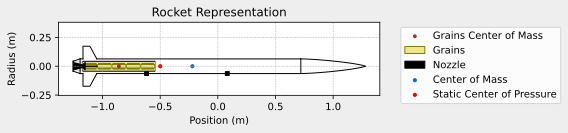


Mass Plots
----------------------------------------


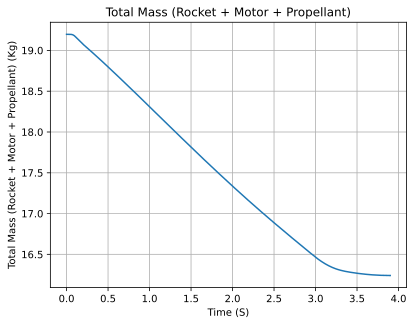

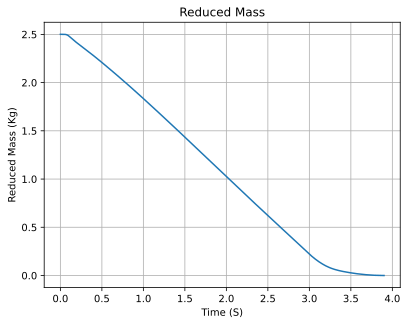


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


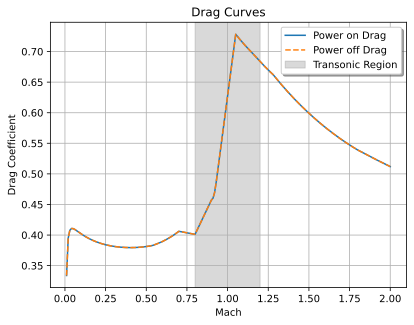


Stability Plots
--------------------


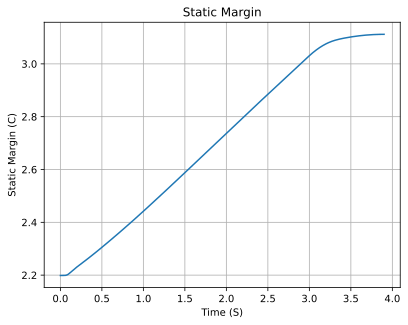

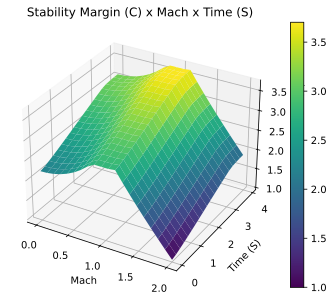


Thrust-to-Weight Plot
----------------------------------------


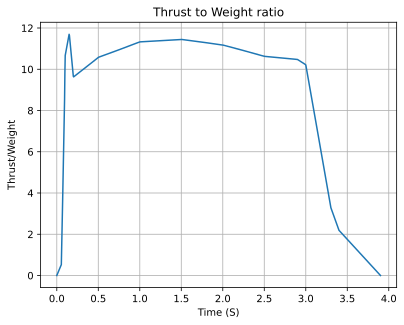

In [14]:
calisto.all_info()

In [15]:
Main = calisto.add_parachute(
    "Main",
    cd_s=10.0,
    trigger=800,
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = calisto.add_parachute(
    "Drogue",
    cd_s=1.0,
    trigger="apogee",
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

In [16]:
test_flight = Flight(
    rocket=calisto, environment=env, rail_length=5.2, inclination=85, heading=0
)


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 1471.47 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.923 | e1: -0.040 | e2: 0.017 | e3: 0.382
Euler Angles - Spin φ : 45.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 2.199 c


Surface Wind Conditions

Frontal Surface Wind Speed: 7.19 m/s
Lateral Surface Wind Speed: -4.10 m/s


Launch Rail

Launch Rail Length: 5.2 m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.368 s
Rail Departure Velocity: 26.206 m/s
Rail Departure Stability Margin: 2.277 c
Rail Departure Angle of Attack: 17.934°
Rail Departure Thrust-Weight Ratio: 10.152
Rail Departure Reynolds Number: 1.973e+05


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 2129.364 m (ASL) | 657.898 m (AGL)
Rocket speed at burn out: 279.853 m/s
Freestream vel

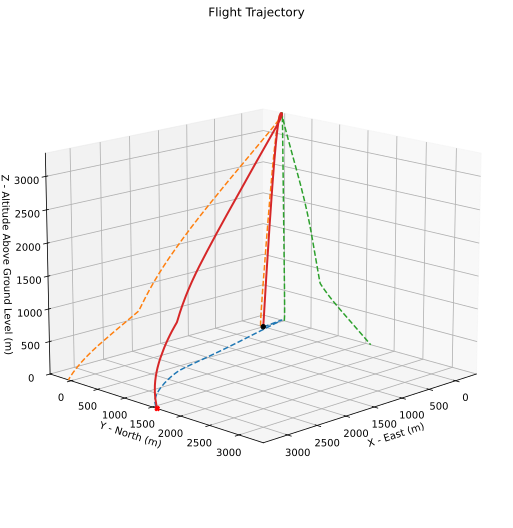



Trajectory Kinematic Plots



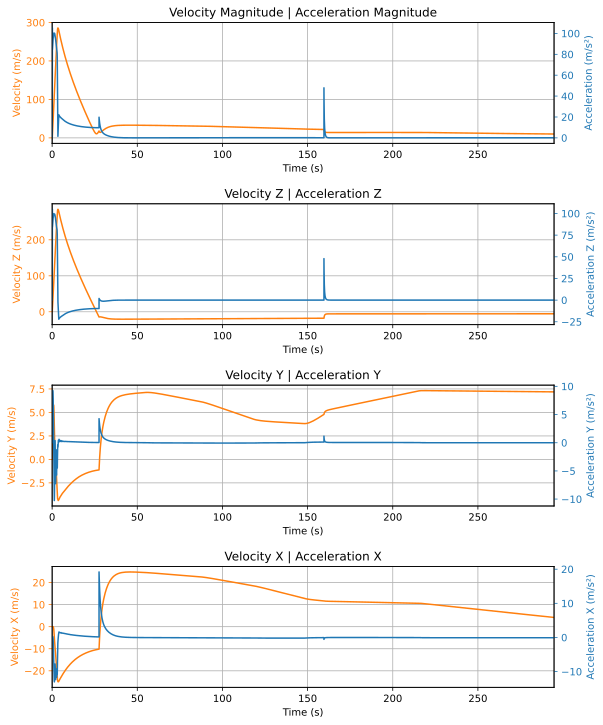



Angular Position Plots



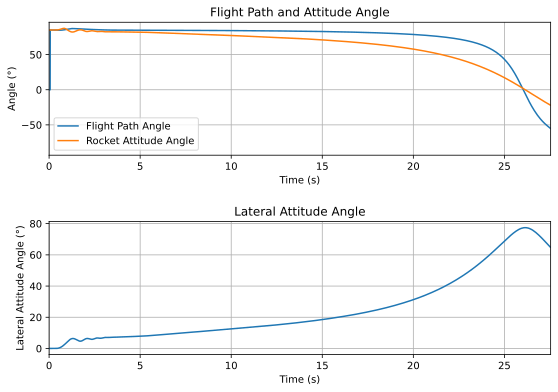



Path, Attitude and Lateral Attitude Angle plots



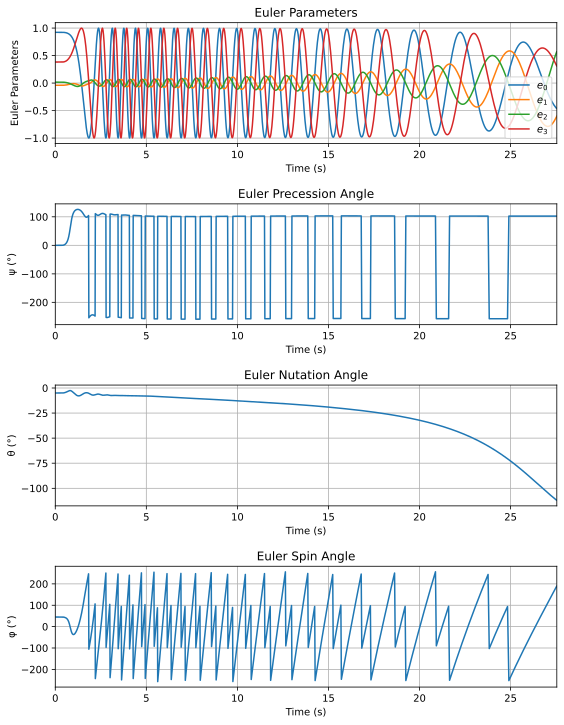



Trajectory Angular Velocity and Acceleration Plots



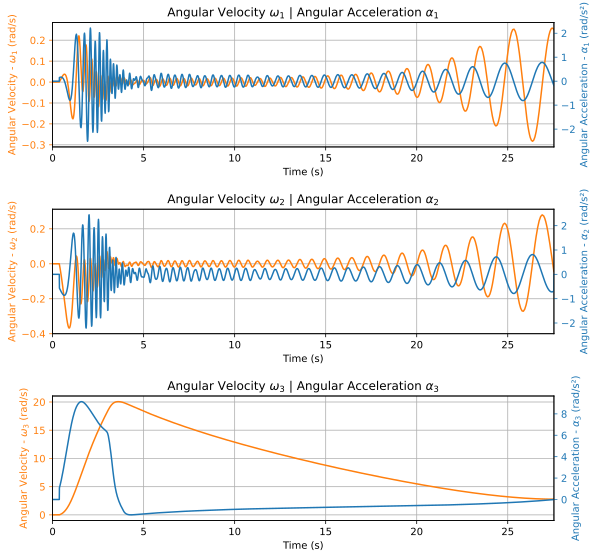



Aerodynamic Forces Plots



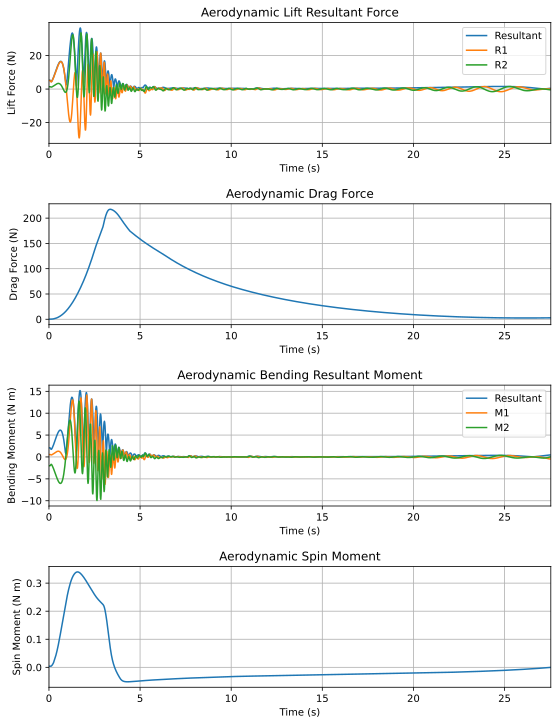



Rail Buttons Forces Plots



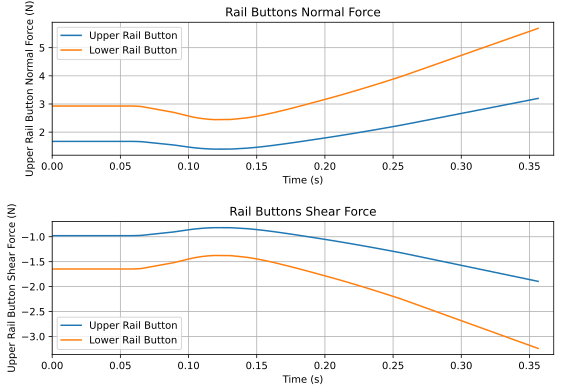



Trajectory Energy Plots



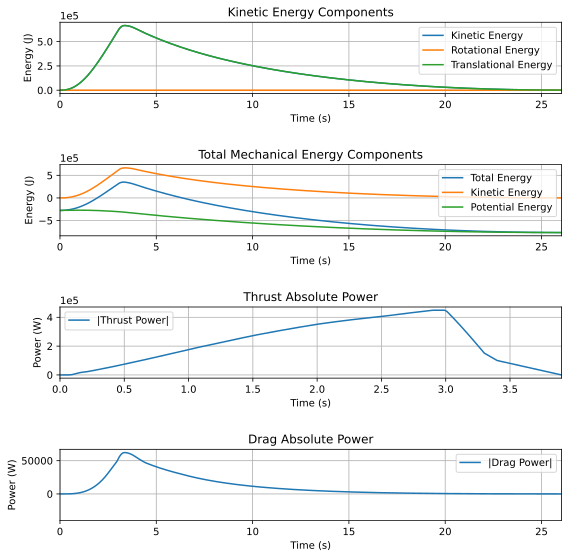



Trajectory Fluid Mechanics Plots



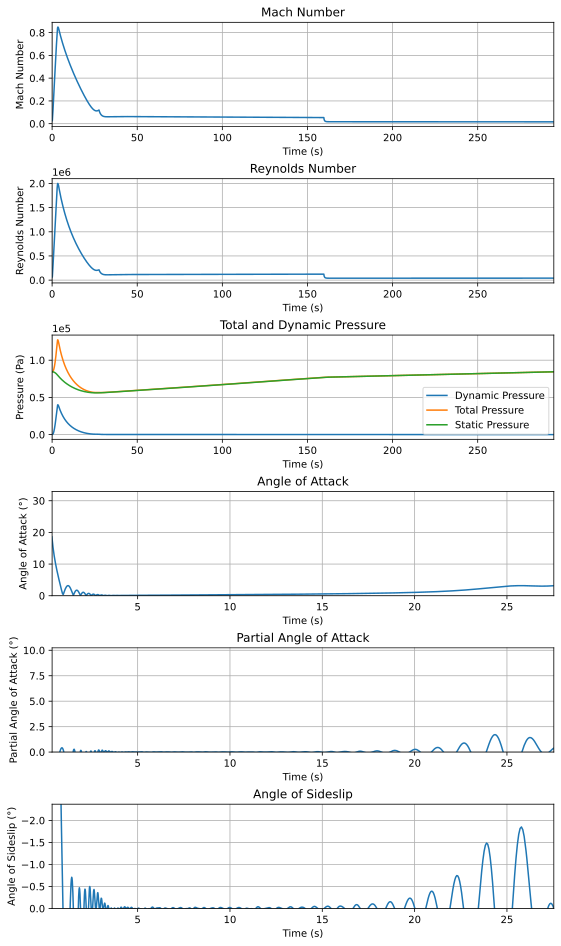



Trajectory Stability and Control Plots



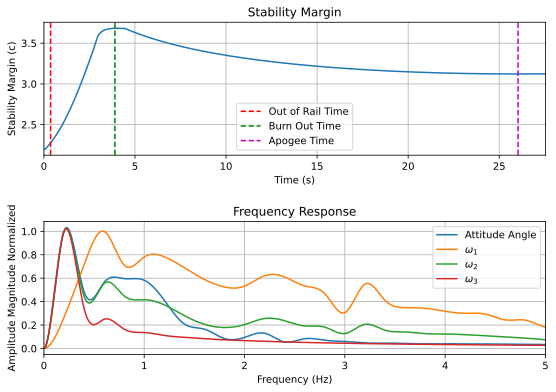



Rocket and Parachute Pressure Plots



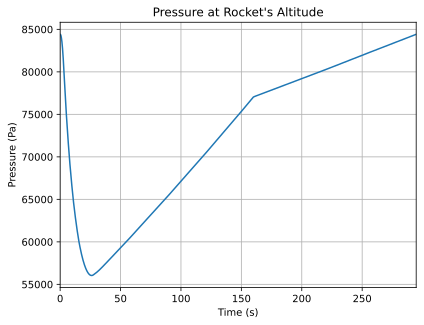


Parachute:  Main


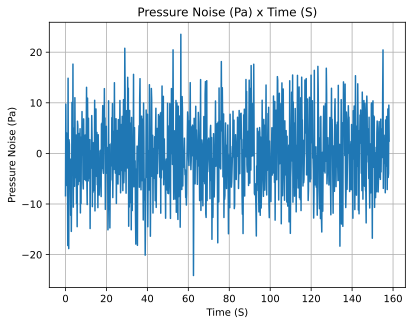

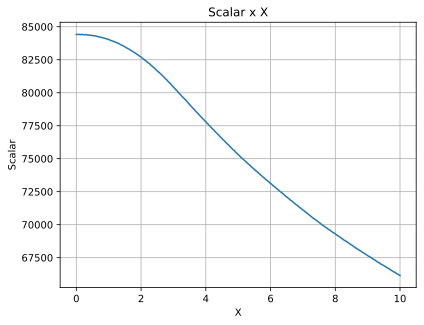

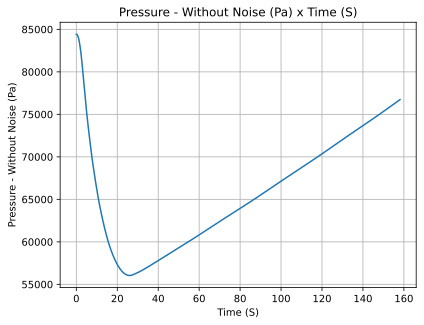


Parachute:  Drogue


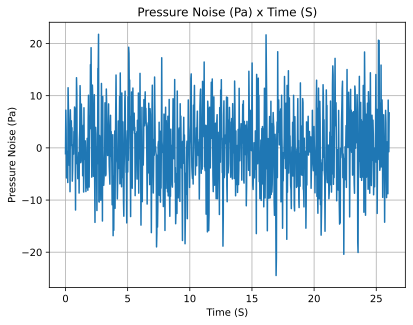

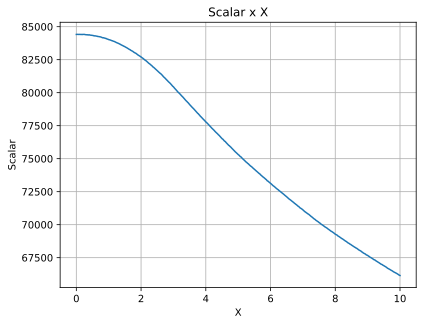

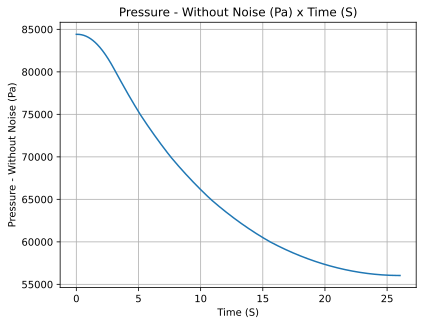

In [17]:
test_flight.all_info()